# Pruebas al modelo de Red Neuronal


In [1]:
import numpy as np
from tensorflow import keras
from extractBofs import extractBofs

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Carga del modelo

In [3]:
model = keras.models.load_model("BOF_nn_model_iimas.h5")

2022-05-31 15:00:28.387990: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180)]             0         
                                                                 
 normalization (Normalizatio  (None, 180)              0         
 n)                                                              
                                                                 
 dense (Dense)               (None, 360)               65160     
                                                                 
 dense_1 (Dense)             (None, 540)               194940    
                                                                 
 dense_2 (Dense)             (None, 360)               194760    
                                                                 
 dense_3 (Dense)             (None, 180)               64980     
                                                             

## Obtención de BOFs

In [5]:
# En la siguiente línea ingresa el nombre de la nube de puntos a utilizar
pcd_name = "1483.247114"

# Algunas nubes de puntos con contornos bien definidos
# 1311877889.705060

# Capa con muchos huecos que genera contornos mal definidos
# 1311877884.601154

dataset_dir = "Proyecto_AYUDAME_Datasets/AYUDAME_02"

La imagen RGB de la nube de puntos es:

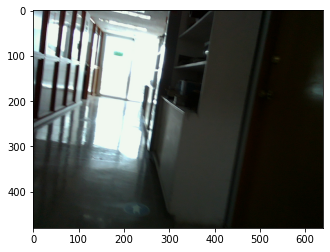

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
bgr_img = cv.imread(dataset_dir+"/rgb_pcd/"+pcd_name+".png")
rgb_img = cv.cvtColor(bgr_img, cv.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

A continuación se realiza el corte de capas y se obtienen los descriptores BOF de cada contorno detectado.

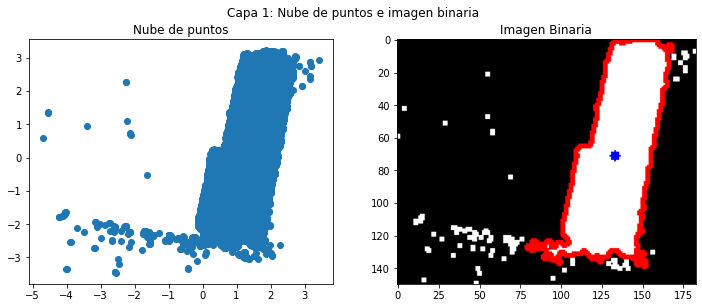

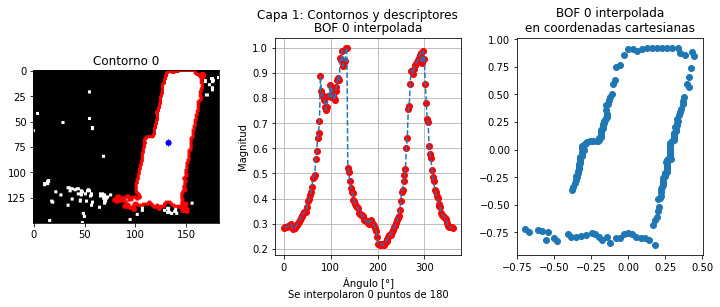

In [7]:
dir_ply_file = dataset_dir+"/pcd/"+pcd_name+".ply"
bofs = extractBofs(dir_ply_file,axis=2,method=2, layers=3, plotBof=True)

Se realiza la predicción utilizando el modelo neuronal.

In [8]:
%%time
# Transforma la lista de BOFs a un arreglo de numpy
bofs_np = np.vstack(bofs)
# Obtiene las probabilidades utilizando el modelo neuronal
probas = model.predict(bofs_np)
# Selecciona a la neurona con mayor probabilidad
bofs_classes = np.argmax(probas,axis=1)

CPU times: user 165 ms, sys: 49.3 ms, total: 215 ms
Wall time: 255 ms


Se despliegan los resultados.

In [12]:
for i in range(len(bofs_classes)):
    print(f"La BOF {i} pertenece a la Zona {bofs_classes[i]}")

La BOF 0 pertenece a la Zona 8


Se observan las probabilidades para conocer la confianza con la que se toman las decisiones

In [11]:
np.set_printoptions(suppress=True)
print(probas)

[[0.00000003 0.         0.06367893 0.00000176 0.00000318 0.10954382
  0.00003014 0.00004926 0.8266929 ]]
